In [1]:
import keras # library for neural network. Need tensorflow to installed before performing this installation.
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
# Reading data 
import pandas as pd

from google.colab import files
file = files.upload()
import io
data = pd.read_csv(io.BytesIO(file['data.csv']))

Saving data.csv to data.csv


In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.drop('Unnamed: 32', axis = 1, inplace = True)
data.drop('id', axis = 1, inplace = True)

In [5]:
#data['diagnosis'] = pd.factorize(data['diagnosis'])[0][12:42 am] ZHANG ZITENG
    

data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})



In [6]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:

# Getting Predicting Value
y = data['diagnosis']

# Getting Features

x = data.drop(columns = 'diagnosis')
#x = data.drop(columns= 'area_se')



In [ ]:
X.shape

NameError: ignored

In [8]:
X = normalize(x, axis=0)

In [9]:
X

array([[0.05180005, 0.02201907, 0.0541219 , ..., 0.08423164, 0.06503422,
        0.05805201],
       [0.05922885, 0.03769547, 0.05857329, ..., 0.05903197, 0.0388707 ,
        0.04346333],
       [0.056695  , 0.04507758, 0.05729517, ..., 0.07712242, 0.05106903,
        0.04276026],
       ...,
       [0.04779771, 0.05956605, 0.04773128, ..., 0.04500395, 0.03135099,
        0.03818055],
       [0.05931523, 0.06221767, 0.06174656, ..., 0.08410469, 0.05776893,
        0.06054205],
       [0.02234399, 0.05205665, 0.02111988, ..., 0.        , 0.04058101,
        0.03436738]])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

AttributeError: ignored

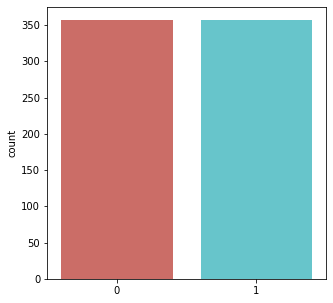

In [10]:
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)

plt.subplots(figsize=(5,5))
graph = sns.countplot(y_b, palette ='hls')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2, y_b.value_counts()[i], ha="center")
    i += 1

In [11]:
X_b.shape

(714, 30)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (571, 30) y: (571,)
Length of test set:  (143, 30) y: (143,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier()

parameters = {
    'n_estimators': [20, 50, 70, 100,110,500, 1000, 5000],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.55],
    'algorithm' : ['SAMME', 'SAMME.R'],
    }

Ada_SE = GridSearchCV(estimator=Ada, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
Ada_SE.fit(X_train,y_train)
best_parameters = Ada_SE.best_params_  
best_score = Ada_SE.best_score_ 
print(best_parameters)
print(best_score)


#test acc
y_pred=Ada_SE.predict(X_test)

# Get the accuracy score
Ada_acc=accuracy_score(y_test, y_pred)
Ada_pre=precision_score(y_test, y_pred)
Ada_recall=recall_score(y_test, y_pred)
Ada_f1=f1_score(y_test, y_pred)

print("Gradient boost - Accuracy: {:.3f}.".format(Ada_acc))
print("Gradient boost - Precision: {:.3f}.".format(Ada_pre))
print("Gradient boost - Recall: {:.3f}.".format(Ada_recall))
print("Gradient boost - F1_Score: {:.3f}.".format(Ada_f1))

scores = cross_val_score(Ada_SE, X_train,y_train, cv=5, verbose=10)
scores.mean() 

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 24.4min finished


{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 100}
0.9790083905415713
Gradient boost - Accuracy: 0.958.
Gradient boost - Precision: 0.958.
Gradient boost - Recall: 0.958.
Gradient boost - F1_Score: 0.958.
[CV]  ................................................................
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.5min finished


[CV] .................................... , score=0.974, total=21.5min
[CV]  ................................................................
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.5min finished


[CV] .................................... , score=0.974, total=21.5min
[CV]  ................................................................
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 43.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.4min finished


[CV] .................................... , score=0.956, total=21.4min
[CV]  ................................................................
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 64.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.4min finished


[CV] .................................... , score=1.000, total=21.7min
[CV]  ................................................................
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 86.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.5min finished


[CV] .................................... , score=0.956, total=21.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 107.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 107.7min finished


0.9719755911517926

In [ ]:
print(cross_val_score(Ada_SE, X_train, y_train, cv=5, scoring='recall'))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.4min finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.5min finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.6min finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.6min finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 21.7min finished


[0.94642857 0.98214286 0.96428571 1.         0.91071429]


In [ ]:
# Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)

[[61  5]
 [ 1 76]]


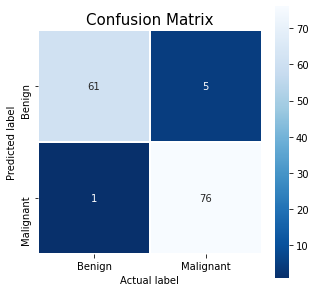

In [ ]:
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(111)
sns.heatmap(cm_1, annot=True, linewidths=.5, square = True, cmap = 'Blues_r',ax=ax);
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Confusion Matrix", size = 15);
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

In [ ]:
filename = 'digits_classifier.joblib.pkl'
joblib.dump(Ada_SE, filename, compress=9)

['digits_classifier.joblib.pkl']

In [14]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
hgb = HistGradientBoostingClassifier( max_depth=None,  random_state=0, verbose=10)

hgb.fit(X_train, y_train)

parameters = {
    'learning_rate': [0.001,0.01,0.1,0.3,0.5,0.7,1],
    'l2_regularization': [0,0.001,0.002,0.003,0.004],
    }

hgb_se = GridSearchCV(estimator=hgb, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1,verbose=1)
hgb_se.fit(X_train,y_train)
y_pred = hgb_se.predict(X_test)
best_parameters = hgb_se.best_params_  
best_score = hgb_se.best_score_ 
print(best_parameters)
print(best_score)

# Get the accuracy score
hgb_acc = accuracy_score(y_test, y_pred)
hgb_pre = precision_score(y_test, y_pred)
hgb_recall = recall_score(y_test, y_pred)
hgb_f1 = f1_score(y_test, y_pred)

print("Hist Gradient Boosting - Accuracy: {:.3f}.".format(hgb_acc))
print("Hist Gradient Boosting - Precision: {:.3f}.".format(hgb_pre))
print("Hist Gradient Boosting - Recall: {:.3f}.".format(hgb_recall))
print("Hist Gradient Boosting - F1_Score: {:.3f}.".format(hgb_f1))

scores = cross_val_score(hgb_se, X_,y_train, cv=5)
scores.mean() 

Binning 0.000 GB of training data: 0.025 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 11 leaves, max depth = 6, in 0.009s
[2/100] 1 tree, 14 leaves, max depth = 7, in 0.008s
[3/100] 1 tree, 19 leaves, max depth = 9, in 0.010s
[4/100] 1 tree, 22 leaves, max depth = 11, in 0.010s
[5/100] 1 tree, 25 leaves, max depth = 11, in 0.011s
[6/100] 1 tree, 22 leaves, max depth = 11, in 0.009s
[7/100] 1 tree, 23 leaves, max depth = 11, in 0.010s
[8/100] 1 tree, 24 leaves, max depth = 12, in 0.011s
[9/100] 1 tree, 24 leaves, max depth = 13, in 0.010s
[10/100] 1 tree, 24 leaves, max depth = 12, in 0.011s
[11/100] 1 tree, 24 leaves, max depth = 13, in 0.010s
[12/100] 1 tree, 24 leaves, max depth = 12, in 0.012s
[13/100] 1 tree, 25 leaves, max depth = 12, in 0.012s
[14/100] 1 tree, 25 leaves, max depth = 13, in 0.010s
[15/100] 1 tree, 25 leaves, max depth = 10, in 0.010s
[16/100] 1 tree, 25 leaves, max depth = 11, in 0.011s
[17/100] 1 tree, 25 leaves, max depth = 13, in 0.012s
[18/100] 1 tree, 2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.3s


Binning 0.000 GB of training data: 0.026 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 9 leaves, max depth = 4, in 0.008s
[2/100] 1 tree, 12 leaves, max depth = 7, in 0.008s
[3/100] 1 tree, 13 leaves, max depth = 7, in 0.009s
[4/100] 1 tree, 16 leaves, max depth = 6, in 0.008s
[5/100] 1 tree, 11 leaves, max depth = 8, in 0.007s
[6/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[7/100] 1 tree, 8 leaves, max depth = 4, in 0.006s
[8/100] 1 tree, 12 leaves, max depth = 6, in 0.008s
[9/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[10/100] 1 tree, 11 leaves, max depth = 5, in 0.008s
[11/100] 1 tree, 10 leaves, max depth = 4, in 0.007s
[12/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[13/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[14/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[15/100] 1 tree, 9 leaves, max depth = 6, in 0.006s
[16/100] 1 tree, 9 leaves, max depth = 4, in 0.007s
[17/100] 1 tree, 8 leaves, max depth = 4, in 0.006s
[18/100] 1 tree, 8 leaves, max depth =

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   34.1s finished


1 tree, 5 leaves, max depth = 3, in 0.010s
[24/100] 1 tree, 5 leaves, max depth = 3, in 0.007s
[25/100] 1 tree, 3 leaves, max depth = 2, in 0.005s
[26/100] 1 tree, 4 leaves, max depth = 3, in 0.007s
[27/100] 1 tree, 4 leaves, max depth = 3, in 0.005s
[28/100] 1 tree, 3 leaves, max depth = 2, in 0.005s
[29/100] 1 tree, 3 leaves, max depth = 2, in 0.007s
[30/100] 1 tree, 3 leaves, max depth = 2, in 0.005s
[31/100] 1 tree, 3 leaves, max depth = 2, in 0.007s
[32/100] 1 tree, 3 leaves, max depth = 2, in 0.006s
[33/100] 1 tree, 2 leaves, max depth = 1, in 0.006s
[34/100] 1 tree, 3 leaves, max depth = 2, in 0.004s
[35/100] 1 tree, 3 leaves, max depth = 2, in 0.008s
[36/100] 1 tree, 3 leaves, max depth = 2, in 0.007s
[37/100] 1 tree, 3 leaves, max depth = 2, in 0.006s
[38/100] 1 tree, 3 leaves, max depth = 2, in 0.008s
[39/100] 1 tree, 3 leaves, max depth = 2, in 0.005s
[40/100] 1 tree, 2 leaves, max depth = 1, in 0.007s
[41/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[42/100] 1 tree, 2 le

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.1s


Binning 0.000 GB of training data: 0.021 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 5 leaves, max depth = 3, in 0.005s
[2/100] 1 tree, 10 leaves, max depth = 5, in 0.008s
[3/100] 1 tree, 8 leaves, max depth = 6, in 0.007s
[4/100] 1 tree, 12 leaves, max depth = 7, in 0.007s
[5/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[6/100] 1 tree, 10 leaves, max depth = 7, in 0.007s
[7/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[8/100] 1 tree, 10 leaves, max depth = 6, in 0.008s
[9/100] 1 tree, 9 leaves, max depth = 4, in 0.006s
[10/100] 1 tree, 10 leaves, max depth = 4, in 0.007s
[11/100] 1 tree, 10 leaves, max depth = 6, in 0.006s
[12/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[13/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[14/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[15/100] 1 tree, 9 leaves, max depth = 6, in 0.009s
[16/100] 1 tree, 8 leaves, max depth = 5, in 0.007s
[17/100] 1 tree, 8 leaves, max depth = 6, in 0.007s
[18/100] 1 tree, 10 leaves, max depth =

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.0s finished


1 tree, 11 leaves, max depth = 6, in 0.011s
[24/100] 1 tree, 7 leaves, max depth = 3, in 0.006s
[25/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[26/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[27/100] 1 tree, 7 leaves, max depth = 4, in 0.006s
[28/100] 1 tree, 11 leaves, max depth = 4, in 0.009s
[29/100] 1 tree, 12 leaves, max depth = 5, in 0.007s
[30/100] 1 tree, 6 leaves, max depth = 3, in 0.006s
[31/100] 1 tree, 9 leaves, max depth = 5, in 0.006s
[32/100] 1 tree, 9 leaves, max depth = 5, in 0.006s
[33/100] 1 tree, 10 leaves, max depth = 4, in 0.011s
[34/100] 1 tree, 7 leaves, max depth = 4, in 0.007s
[35/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[36/100] 1 tree, 11 leaves, max depth = 5, in 0.014s
[37/100] 1 tree, 10 leaves, max depth = 5, in 0.006s
[38/100] 1 tree, 9 leaves, max depth = 4, in 0.006s
[39/100] 1 tree, 9 leaves, max depth = 5, in 0.009s
[40/100] 1 tree, 10 leaves, max depth = 4, in 0.008s
[41/100] 1 tree, 9 leaves, max depth = 6, in 0.008s
[42/100] 1 tre

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.9s


Binning 0.000 GB of training data: 0.020 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 4, in 0.006s
[2/100] 1 tree, 14 leaves, max depth = 6, in 0.009s
[3/100] 1 tree, 11 leaves, max depth = 7, in 0.008s
[4/100] 1 tree, 16 leaves, max depth = 8, in 0.008s
[5/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[6/100] 1 tree, 12 leaves, max depth = 7, in 0.007s
[7/100] 1 tree, 9 leaves, max depth = 6, in 0.007s
[8/100] 1 tree, 9 leaves, max depth = 4, in 0.007s
[9/100] 1 tree, 9 leaves, max depth = 4, in 0.007s
[10/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[11/100] 1 tree, 9 leaves, max depth = 4, in 0.008s
[12/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[13/100] 1 tree, 8 leaves, max depth = 3, in 0.006s
[14/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[15/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[16/100] 1 tree, 8 leaves, max depth = 4, in 0.006s
[17/100] 1 tree, 7 leaves, max depth = 4, in 0.005s
[18/100] 1 tree, 6 leaves, max depth = 3, 

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.3s finished


1 tree, 3 leaves, max depth = 2, in 0.010s
[24/100] 1 tree, 4 leaves, max depth = 3, in 0.005s
[25/100] 1 tree, 4 leaves, max depth = 3, in 0.006s
[26/100] 1 tree, 3 leaves, max depth = 2, in 0.004s
[27/100] 1 tree, 3 leaves, max depth = 2, in 0.008s
[28/100] 1 tree, 3 leaves, max depth = 2, in 0.005s
[29/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[30/100] 1 tree, 3 leaves, max depth = 2, in 0.004s
[31/100] 1 tree, 2 leaves, max depth = 1, in 0.007s
[32/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[33/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[34/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[35/100] 1 tree, 2 leaves, max depth = 1, in 0.008s
[36/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[37/100] 1 tree, 2 leaves, max depth = 1, in 0.013s
[38/100] 1 tree, 2 leaves, max depth = 1, in 0.006s
[39/100] 1 tree, 2 leaves, max depth = 1, in 0.006s
[40/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[41/100] 1 tree, 2 leaves, max depth = 1, in 0.007s
[42/100] 1 tree, 2 le

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s


Binning 0.000 GB of training data: 0.023 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 5, in 0.018s
[2/100] 1 tree, 14 leaves, max depth = 8, in 0.009s
[3/100] 1 tree, 19 leaves, max depth = 10, in 0.010s
[4/100] 1 tree, 18 leaves, max depth = 10, in 0.009s
[5/100] 1 tree, 21 leaves, max depth = 10, in 0.009s
[6/100] 1 tree, 20 leaves, max depth = 9, in 0.016s
[7/100] 1 tree, 20 leaves, max depth = 7, in 0.009s
[8/100] 1 tree, 20 leaves, max depth = 10, in 0.009s
[9/100] 1 tree, 20 leaves, max depth = 7, in 0.010s
[10/100] 1 tree, 19 leaves, max depth = 10, in 0.010s
[11/100] 1 tree, 19 leaves, max depth = 7, in 0.009s
[12/100] 1 tree, 19 leaves, max depth = 7, in 0.010s
[13/100] 1 tree, 20 leaves, max depth = 9, in 0.011s
[14/100] 1 tree, 19 leaves, max depth = 7, in 0.009s
[15/100] 1 tree, 20 leaves, max depth = 7, in 0.009s
[16/100] 

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.6s finished


1 tree, 20 leaves, max depth = 8, in 0.013s
[17/100] 1 tree, 19 leaves, max depth = 8, in 0.007s
[18/100] 1 tree, 19 leaves, max depth = 9, in 0.011s
[19/100] 1 tree, 20 leaves, max depth = 8, in 0.010s
[20/100] 1 tree, 19 leaves, max depth = 8, in 0.009s
[21/100] 1 tree, 19 leaves, max depth = 7, in 0.008s
[22/100] 1 tree, 18 leaves, max depth = 7, in 0.008s
[23/100] 1 tree, 17 leaves, max depth = 8, in 0.009s
[24/100] 1 tree, 15 leaves, max depth = 6, in 0.010s
[25/100] 1 tree, 17 leaves, max depth = 10, in 0.008s
[26/100] 1 tree, 14 leaves, max depth = 8, in 0.007s
[27/100] 1 tree, 12 leaves, max depth = 6, in 0.007s
[28/100] 1 tree, 14 leaves, max depth = 9, in 0.009s
[29/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[30/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[31/100] 1 tree, 7 leaves, max depth = 5, in 0.007s
[32/100] 1 tree, 6 leaves, max depth = 4, in 0.008s
[33/100] 1 tree, 5 leaves, max depth = 3, in 0.007s
[34/100] 1 tree, 4 leaves, max depth = 3, in 0.010s
[35/1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s


Binning 0.000 GB of training data: 0.020 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 5, in 0.014s
[2/100] 1 tree, 12 leaves, max depth = 7, in 0.009s
[3/100] 1 tree, 10 leaves, max depth = 6, in 0.009s
[4/100] 1 tree, 10 leaves, max depth = 5, in 0.009s
[5/100] 1 tree, 12 leaves, max depth = 6, in 0.009s
[6/100] 1 tree, 10 leaves, max depth = 6, in 0.008s
[7/100] 1 tree, 12 leaves, max depth = 6, in 0.009s
[8/100] 1 tree, 13 leaves, max depth = 6, in 0.009s
[9/100] 1 tree, 12 leaves, max depth = 4, in 0.008s
[10/100] 1 tree, 12 leaves, max depth = 6, in 0.008s
[11/100] 1 tree, 11 leaves, max depth = 4, in 0.008s
[12/100] 1 tree, 9 leaves, max depth = 5, in 0.008s
[13/100] 1 tree, 10 leaves, max depth = 6, in 0.008s
[14/100] 1 tree, 9 leaves, max depth = 6, in 0.008s
[15/100] 1 tree, 9 leaves, max depth = 6, in 0.008s
[16/100] 1 tree, 11 leaves, max depth = 5, in 0.008s
[17/100] 1 tree, 8 leaves, max depth = 6, in 0.006s
[18/100] 1 tree, 11 leaves, max depth

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   31.4s finished


1 tree, 9 leaves, max depth = 6, in 0.016s
[20/100] 1 tree, 9 leaves, max depth = 7, in 0.009s
[21/100] 1 tree, 7 leaves, max depth = 5, in 0.008s
[22/100] 1 tree, 9 leaves, max depth = 7, in 0.006s
[23/100] 1 tree, 9 leaves, max depth = 5, in 0.006s
[24/100] 1 tree, 9 leaves, max depth = 7, in 0.010s
[25/100] 1 tree, 8 leaves, max depth = 4, in 0.010s
[26/100] 1 tree, 10 leaves, max depth = 6, in 0.010s
[27/100] 1 tree, 8 leaves, max depth = 3, in 0.007s
[28/100] 1 tree, 10 leaves, max depth = 7, in 0.008s
[29/100] 1 tree, 8 leaves, max depth = 5, in 0.016s
[30/100] 1 tree, 8 leaves, max depth = 5, in 0.008s
[31/100] 1 tree, 9 leaves, max depth = 5, in 0.008s
[32/100] 1 tree, 9 leaves, max depth = 5, in 0.006s
[33/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[34/100] 1 tree, 9 leaves, max depth = 4, in 0.016s
[35/100] 1 tree, 9 leaves, max depth = 5, in 0.012s
[36/100] 1 tree, 9 leaves, max depth = 5, in 0.008s
[37/100] 1 tree, 9 leaves, max depth = 6, in 0.006s
[38/100] 1 tree, 11

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.3s


Binning 0.000 GB of training data: 0.023 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 7 leaves, max depth = 4, in 0.014s
[2/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[3/100] 1 tree, 10 leaves, max depth = 5, in 0.008s
[4/100] 1 tree, 12 leaves, max depth = 7, in 0.008s
[5/100] 1 tree, 11 leaves, max depth = 6, in 0.008s
[6/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[7/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[8/100] 1 tree, 13 leaves, max depth = 5, in 0.008s
[9/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[10/100] 1 tree, 10 leaves, max depth = 7, in 0.007s
[11/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[12/100] 1 tree, 9 leaves, max depth = 7, in 0.007s
[13/100] 1 tree, 13 leaves, max depth = 6, in 0.008s
[14/100] 1 tree, 7 leaves, max depth = 5, in 0.007s
[15/100] 1 tree, 12 leaves, max depth = 6, in 0.007s
[16/100] 1 tree, 8 leaves, max depth = 5, in 0.007s
[17/100] 1 tree, 9 leaves, max depth = 4, in 0.006s
[18/100] 1 tree, 13 leaves, max depth

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.8s finished


1 tree, 7 leaves, max depth = 6, in 0.011s
[22/100] 1 tree, 11 leaves, max depth = 6, in 0.009s
[23/100] 1 tree, 8 leaves, max depth = 4, in 0.007s
[24/100] 1 tree, 11 leaves, max depth = 4, in 0.008s
[25/100] 1 tree, 8 leaves, max depth = 4, in 0.008s
[26/100] 1 tree, 10 leaves, max depth = 5, in 0.009s
[27/100] 1 tree, 7 leaves, max depth = 5, in 0.008s
[28/100] 1 tree, 8 leaves, max depth = 5, in 0.008s
[29/100] 1 tree, 7 leaves, max depth = 5, in 0.008s
[30/100] 1 tree, 8 leaves, max depth = 4, in 0.006s
[31/100] 1 tree, 9 leaves, max depth = 6, in 0.006s
[32/100] 1 tree, 9 leaves, max depth = 5, in 0.014s
[33/100] 1 tree, 11 leaves, max depth = 5, in 0.019s
[34/100] 1 tree, 12 leaves, max depth = 6, in 0.012s
[35/100] 1 tree, 7 leaves, max depth = 3, in 0.008s
[36/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[37/100] 1 tree, 7 leaves, max depth = 4, in 0.006s
[38/100] 1 tree, 7 leaves, max depth = 5, in 0.009s
[39/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[40/100] 1 tree,

0.9737757437070937

In [15]:
print(cross_val_score(hgb_se, X_train, y_train, cv=5, scoring='recall'))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.0s


Binning 0.000 GB of training data: 0.024 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 5 leaves, max depth = 3, in 0.011s
[2/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[3/100] 1 tree, 8 leaves, max depth = 6, in 0.007s
[4/100] 1 tree, 12 leaves, max depth = 7, in 0.007s
[5/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[6/100] 1 tree, 10 leaves, max depth = 7, in 0.007s
[7/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[8/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[9/100] 1 tree, 9 leaves, max depth = 4, in 0.006s
[10/100] 1 tree, 10 leaves, max depth = 4, in 0.006s
[11/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[12/100] 1 tree, 8 leaves, max depth = 5, in 0.007s
[13/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[14/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[15/100] 1 tree, 9 leaves, max depth = 6, in 0.006s
[16/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[17/100] 1 tree, 8 leaves, max depth = 6, in 0.006s
[18/100] 1 tree, 10 leaves, max depth =

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.1s finished


1 tree, 11 leaves, max depth = 6, in 0.011s
[24/100] 1 tree, 7 leaves, max depth = 3, in 0.007s
[25/100] 1 tree, 8 leaves, max depth = 5, in 0.007s
[26/100] 1 tree, 9 leaves, max depth = 5, in 0.006s
[27/100] 1 tree, 7 leaves, max depth = 4, in 0.006s
[28/100] 1 tree, 11 leaves, max depth = 4, in 0.007s
[29/100] 1 tree, 12 leaves, max depth = 5, in 0.009s
[30/100] 1 tree, 6 leaves, max depth = 3, in 0.013s
[31/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[32/100] 1 tree, 9 leaves, max depth = 5, in 0.010s
[33/100] 1 tree, 10 leaves, max depth = 4, in 0.010s
[34/100] 1 tree, 7 leaves, max depth = 4, in 0.008s
[35/100] 1 tree, 9 leaves, max depth = 5, in 0.006s
[36/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[37/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[38/100] 1 tree, 9 leaves, max depth = 4, in 0.007s
[39/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[40/100] 1 tree, 10 leaves, max depth = 4, in 0.006s
[41/100] 1 tree, 9 leaves, max depth = 6, in 0.009s
[42/100] 1 tre

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.9s


Binning 0.000 GB of training data: 0.025 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 4, in 0.003s
[2/100] 1 tree, 14 leaves, max depth = 6, in 0.022s
[3/100] 1 tree, 11 leaves, max depth = 7, in 0.008s
[4/100] 1 tree, 16 leaves, max depth = 8, in 0.009s
[5/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[6/100] 1 tree, 12 leaves, max depth = 7, in 0.007s
[7/100] 1 tree, 9 leaves, max depth = 6, in 0.007s
[8/100] 1 tree, 9 leaves, max depth = 4, in 0.007s
[9/100] 1 tree, 9 leaves, max depth = 4, in 0.007s
[10/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[11/100] 1 tree, 9 leaves, max depth = 4, in 0.007s
[12/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[13/100] 1 tree, 8 leaves, max depth = 3, in 0.006s
[14/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[15/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[16/100] 1 tree, 8 leaves, max depth = 4, in 0.005s
[17/100] 1 tree, 7 leaves, max depth = 4, in 0.006s
[18/100] 1 tree, 6 leaves, max depth = 3, 

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.6s finished


1 tree, 4 leaves, max depth = 2, in 0.010s
[23/100] 1 tree, 3 leaves, max depth = 2, in 0.006s
[24/100] 1 tree, 4 leaves, max depth = 3, in 0.006s
[25/100] 1 tree, 4 leaves, max depth = 3, in 0.005s
[26/100] 1 tree, 3 leaves, max depth = 2, in 0.005s
[27/100] 1 tree, 3 leaves, max depth = 2, in 0.009s
[28/100] 1 tree, 3 leaves, max depth = 2, in 0.007s
[29/100] 1 tree, 2 leaves, max depth = 1, in 0.006s
[30/100] 1 tree, 3 leaves, max depth = 2, in 0.004s
[31/100] 1 tree, 2 leaves, max depth = 1, in 0.008s
[32/100] 1 tree, 2 leaves, max depth = 1, in 0.002s
[33/100] 1 tree, 2 leaves, max depth = 1, in 0.007s
[34/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[35/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[36/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[37/100] 1 tree, 2 leaves, max depth = 1, in 0.003s
[38/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[39/100] 1 tree, 2 leaves, max depth = 1, in 0.002s
[40/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[41/100] 1 tree, 2 le

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s


Binning 0.000 GB of training data: 0.046 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 5, in 0.011s
[2/100] 1 tree, 14 leaves, max depth = 8, in 0.009s
[3/100] 1 tree, 19 leaves, max depth = 10, in 0.020s
[4/100] 1 tree, 18 leaves, max depth = 10, in 0.009s
[5/100] 1 tree, 21 leaves, max depth = 10, in 0.009s
[6/100] 1 tree, 20 leaves, max depth = 9, in 0.010s
[7/100] 1 tree, 20 leaves, max depth = 7, in 0.009s
[8/100] 1 tree, 20 leaves, max depth = 10, in 0.010s
[9/100] 1 tree, 20 leaves, max depth = 7, in 0.009s
[10/100] 1 tree, 19 leaves, max depth = 10, in 0.008s
[11/100] 1 tree, 19 leaves, max depth = 7, in 0.009s
[12/100] 1 tree, 19 leaves, max depth = 7, in 0.009s
[13/100] 1 tree, 20 leaves, max depth = 9, in 0.009s
[14/100] 

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.9s finished


1 tree, 19 leaves, max depth = 7, in 0.017s
[15/100] 1 tree, 20 leaves, max depth = 7, in 0.010s
[16/100] 1 tree, 20 leaves, max depth = 8, in 0.009s
[17/100] 1 tree, 19 leaves, max depth = 8, in 0.008s
[18/100] 1 tree, 19 leaves, max depth = 9, in 0.008s
[19/100] 1 tree, 20 leaves, max depth = 8, in 0.011s
[20/100] 1 tree, 19 leaves, max depth = 8, in 0.009s
[21/100] 1 tree, 19 leaves, max depth = 7, in 0.009s
[22/100] 1 tree, 18 leaves, max depth = 7, in 0.008s
[23/100] 1 tree, 17 leaves, max depth = 8, in 0.008s
[24/100] 1 tree, 15 leaves, max depth = 6, in 0.009s
[25/100] 1 tree, 17 leaves, max depth = 10, in 0.014s
[26/100] 1 tree, 14 leaves, max depth = 8, in 0.009s
[27/100] 1 tree, 12 leaves, max depth = 6, in 0.008s
[28/100] 1 tree, 14 leaves, max depth = 9, in 0.008s
[29/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[30/100] 1 tree, 11 leaves, max depth = 6, in 0.006s
[31/100] 1 tree, 7 leaves, max depth = 5, in 0.009s
[32/100] 1 tree, 6 leaves, max depth = 4, in 0.007s
[33

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s


Binning 0.000 GB of training data: 0.039 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 5, in 0.008s
[2/100] 1 tree, 12 leaves, max depth = 7, in 0.008s
[3/100] 1 tree, 10 leaves, max depth = 6, in 0.008s
[4/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[5/100] 1 tree, 12 leaves, max depth = 6, in 0.008s
[6/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[7/100] 1 tree, 12 leaves, max depth = 6, in 0.008s
[8/100] 1 tree, 13 leaves, max depth = 6, in 0.007s
[9/100] 1 tree, 12 leaves, max depth = 4, in 0.008s
[10/100] 1 tree, 12 leaves, max depth = 6, in 0.013s
[11/100] 1 tree, 11 leaves, max depth = 4, in 0.007s
[12/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[13/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[14/100] 1 tree, 9 leaves, max depth = 6, in 0.007s
[15/100] 1 tree, 9 leaves, max depth = 6, in 0.007s
[16/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[17/100] 1 tree, 8 leaves, max depth = 6, in 0.006s
[18/100] 

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   32.0s finished


1 tree, 11 leaves, max depth = 5, in 0.006s
[19/100] 1 tree, 9 leaves, max depth = 6, in 0.011s
[20/100] 1 tree, 9 leaves, max depth = 7, in 0.007s
[21/100] 1 tree, 7 leaves, max depth = 5, in 0.007s
[22/100] 1 tree, 9 leaves, max depth = 7, in 0.006s
[23/100] 1 tree, 9 leaves, max depth = 5, in 0.005s
[24/100] 1 tree, 9 leaves, max depth = 7, in 0.008s
[25/100] 1 tree, 8 leaves, max depth = 4, in 0.007s
[26/100] 1 tree, 10 leaves, max depth = 6, in 0.007s
[27/100] 1 tree, 8 leaves, max depth = 3, in 0.005s
[28/100] 1 tree, 10 leaves, max depth = 7, in 0.006s
[29/100] 1 tree, 8 leaves, max depth = 5, in 0.010s
[30/100] 1 tree, 8 leaves, max depth = 5, in 0.009s
[31/100] 1 tree, 9 leaves, max depth = 5, in 0.010s
[32/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[33/100] 1 tree, 8 leaves, max depth = 5, in 0.008s
[34/100] 1 tree, 9 leaves, max depth = 4, in 0.006s
[35/100] 1 tree, 9 leaves, max depth = 5, in 0.015s
[36/100] 1 tree, 9 leaves, max depth = 5, in 0.007s
[37/100] 1 tree, 9

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.3s


Binning 0.000 GB of training data: 0.024 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 7 leaves, max depth = 4, in 0.007s
[2/100] 1 tree, 11 leaves, max depth = 6, in 0.008s
[3/100] 1 tree, 10 leaves, max depth = 5, in 0.008s
[4/100] 1 tree, 12 leaves, max depth = 7, in 0.019s
[5/100] 1 tree, 11 leaves, max depth = 6, in 0.009s
[6/100] 1 tree, 10 leaves, max depth = 6, in 0.008s
[7/100] 1 tree, 10 leaves, max depth = 5, in 0.008s
[8/100] 1 tree, 13 leaves, max depth = 5, in 0.008s
[9/100] 1 tree, 11 leaves, max depth = 5, in 0.008s
[10/100] 1 tree, 10 leaves, max depth = 7, in 0.007s
[11/100] 1 tree, 10 leaves, max depth = 6, in 0.008s
[12/100] 1 tree, 9 leaves, max depth = 7, in 0.007s
[13/100] 1 tree, 13 leaves, max depth = 6, in 0.007s
[14/100] 1 tree, 7 leaves, max depth = 5, in 0.006s
[15/100] 1 tree, 12 leaves, max depth = 6, in 0.008s
[16/100] 1 tree, 8 leaves, max depth = 5, in 0.007s
[17/100] 1 tree, 9 leaves, max depth = 4, in 0.005s
[18/100] 1 tree, 13 leaves, max depth

[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   30.9s finished


1 tree, 10 leaves, max depth = 4, in 0.007s
[21/100] 1 tree, 7 leaves, max depth = 6, in 0.009s
[22/100] 1 tree, 11 leaves, max depth = 6, in 0.007s
[23/100] 1 tree, 8 leaves, max depth = 4, in 0.007s
[24/100] 1 tree, 11 leaves, max depth = 4, in 0.007s
[25/100] 1 tree, 8 leaves, max depth = 4, in 0.008s
[26/100] 1 tree, 10 leaves, max depth = 5, in 0.007s
[27/100] 1 tree, 7 leaves, max depth = 5, in 0.007s
[28/100] 1 tree, 8 leaves, max depth = 5, in 0.006s
[29/100] 1 tree, 7 leaves, max depth = 5, in 0.006s
[30/100] 1 tree, 8 leaves, max depth = 4, in 0.005s
[31/100] 1 tree, 9 leaves, max depth = 6, in 0.005s
[32/100] 1 tree, 9 leaves, max depth = 5, in 0.008s
[33/100] 1 tree, 11 leaves, max depth = 5, in 0.007s
[34/100] 1 tree, 12 leaves, max depth = 6, in 0.009s
[35/100] 1 tree, 7 leaves, max depth = 3, in 0.009s
[36/100] 1 tree, 8 leaves, max depth = 5, in 0.007s
[37/100] 1 tree, 7 leaves, max depth = 4, in 0.005s
[38/100] 1 tree, 7 leaves, max depth = 5, in 0.010s
[39/100] 1 tree

Recall mean: 0.9724

In [16]:
# Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)

[[63  3]
 [ 1 76]]


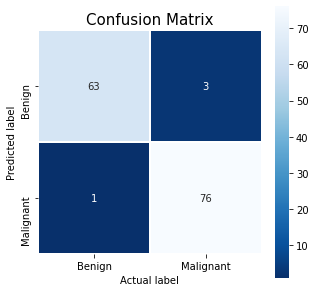

In [17]:
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(111)
sns.heatmap(cm_1, annot=True, linewidths=.5, square = True, cmap = 'Blues_r',ax=ax);
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title("Confusion Matrix", size = 15);
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

In [ ]:
filename = 'histboostingcancermodel.joblib.pkl'
joblib.dump(Ada_SE, filename, compress=9)

['histboostingcancermodel.joblib.pkl']